In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
(X_train, y_train) , (X_test, y_test) = keras.datasets.mnist.load_data()

In [3]:
len(X_train)

60000

In [4]:
len(X_test)

10000

In [5]:
X_train.shape

(60000, 28, 28)

In [6]:
X_train[1]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,  51, 159, 253, 159,  50,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,  48, 238, 252, 252, 252, 237,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

In [7]:
X_train = X_train/255
X_test = X_test/255

In [8]:
X_train_flattened = X_train.reshape(len(X_train),28*28)
X_test_flattened = X_test.reshape(len(X_test),28*28)

In [9]:
X_train_flattened.shape

(60000, 784)

In [10]:
X_test_flattened.shape

(10000, 784)

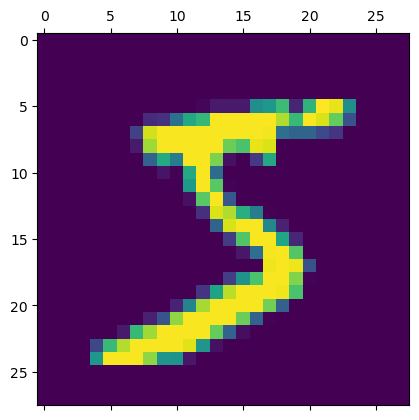

In [11]:
plt.matshow(X_train[0])

In [12]:
model = keras.Sequential([
    keras.layers.Dense(10, input_shape=(784,), activation='sigmoid')
])
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)
model.fit(X_train_flattened, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 2s 953us/step - loss: 0.4703 - accuracy: 0.8778
Epoch 2/5
1875/1875 [==============================] - 2s 937us/step - loss: 0.3042 - accuracy: 0.9156
Epoch 3/5
1875/1875 [==============================] - 2s 958us/step - loss: 0.2838 - accuracy: 0.9206
Epoch 4/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2731 - accuracy: 0.9239
Epoch 5/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2666 - accuracy: 0.9258


In [13]:
model.evaluate(X_test_flattened, y_test)

313/313 [==============================] - 0s 854us/step - loss: 0.2687 - accuracy: 0.9269


[0.2686728239059448, 0.9269000291824341]

In [14]:
y_predict = model.predict(X_test_flattened)
y_predict

313/313 [==============================] - 0s 710us/step


array([[3.6916688e-02, 3.0625921e-07, 9.9040836e-02, ..., 9.9983662e-01,
        1.3064030e-01, 6.7256314e-01],
       [4.1351026e-01, 2.1414105e-03, 9.9958163e-01, ..., 8.0291866e-13,
        1.5258944e-01, 2.4823072e-09],
       [5.0192315e-04, 9.9294186e-01, 7.1304125e-01, ..., 1.3019419e-01,
        4.4516498e-01, 5.8959872e-02],
       ...,
       [8.1217968e-06, 3.5773967e-06, 2.5606893e-03, ..., 3.3499783e-01,
        6.5839797e-01, 8.5636222e-01],
       [2.3123468e-04, 1.2865456e-04, 2.1900309e-04, ..., 5.8223770e-05,
        6.7188489e-01, 1.2813239e-04],
       [1.4259592e-02, 1.2247707e-10, 3.4269792e-01, ..., 1.4942160e-08,
        2.5596566e-04, 8.1073102e-07]], dtype=float32)

In [15]:
y_predict[0]

array([3.6916688e-02, 3.0625921e-07, 9.9040836e-02, 9.5036489e-01,
       3.9636292e-03, 1.9200559e-01, 2.4001554e-06, 9.9983662e-01,
       1.3064030e-01, 6.7256314e-01], dtype=float32)

In [16]:
y_test[0]

7

In [17]:
np.argmax(y_predict[0])

7

In [19]:
y_predict_labels = [np.argmax(i) for i in y_predict]

In [20]:
y_predict_labels[:5]

[7, 2, 1, 0, 4]

In [23]:
cm = tf.math.confusion_matrix(labels = y_test, predictions = y_predict_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 967,    0,    1,    2,    0,    4,    3,    2,    1,    0],
       [   0, 1110,    3,    2,    0,    2,    4,    2,   12,    0],
       [   6,    6,  938,   10,    9,    4,   11,   10,   36,    2],
       [   4,    0,   24,  907,    0,   30,    2,   12,   23,    8],
       [   2,    1,    7,    1,  923,    0,    7,    5,    9,   27],
       [  10,    2,    6,   20,    9,  795,    9,    6,   28,    7],
       [  13,    3,   11,    1,    8,   17,  901,    2,    2,    0],
       [   1,    5,   26,    4,    8,    1,    0,  956,    2,   25],
       [   8,    6,    7,   17,    9,   32,    9,   11,  869,    6],
       [  11,    4,    1,    9,   34,    9,    0,   28,   10,  903]])>

Text(120.72222222222221, 0.5, 'Truth')

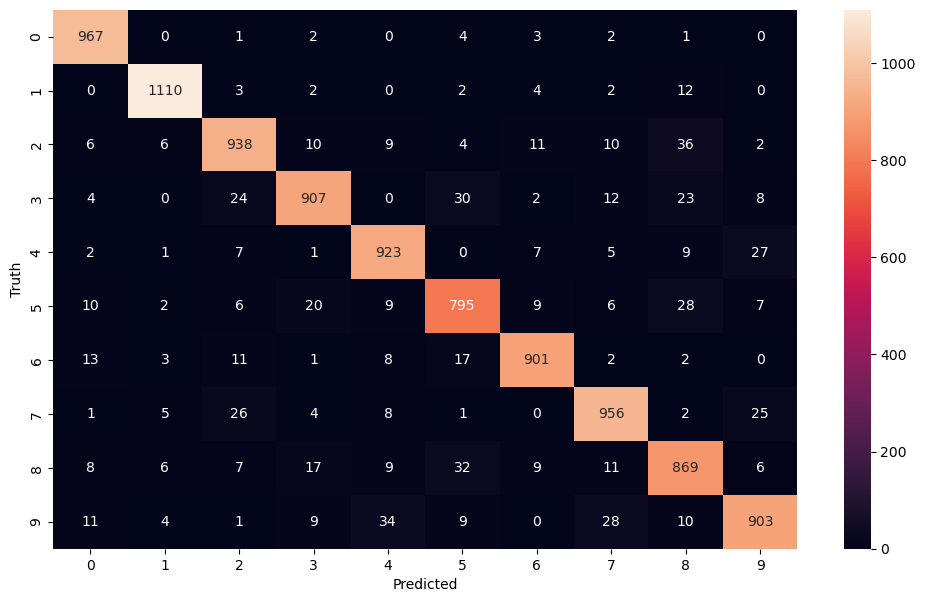

In [25]:
import seaborn as sns
plt.figure(figsize = (12,7))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel("Predicted")
plt.ylabel("Truth")

## Lets see the accuracy by adding hidden layer ##

In [26]:
model = keras.Sequential([
    keras.layers.Dense(100, input_shape=(784,), activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)
model.fit(X_train_flattened, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2799 - accuracy: 0.9195
Epoch 2/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.1288 - accuracy: 0.9628
Epoch 3/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0887 - accuracy: 0.9740
Epoch 4/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0674 - accuracy: 0.9796
Epoch 5/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0538 - accuracy: 0.9837


## The Accuracy is increased a lot by adding hidden layer ##